- 모델을 이용해서 추론하는 상황은 input, output이 이런 형태
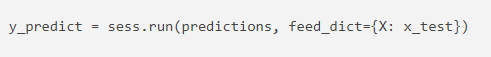

- 즉, 학습할 때는 X, y 모두 넣었지만
- 이제 예측을 위해 X만 넣으면 돼 => 모델 결과가 y야
- output = sess.run(output_tensor, feed_dict={input_tensor: input_data}) 꼴

- 구체적인 구현은 MyMathTeacher/dktAI/inference/inference_test.py에 있음
- 이론은 MyMathTeacher/Analysis, Design/learn/tensorflow에 있음

======================= 잘못 분석 ======================= <br/>
이건 학습 중(valid, test) evaluate, run_optimization, waviness 등을 하려고 만든 거야
실제 예측을 위한 게 아니라

In [ ]:
# A. output 메서드
def get_output_layer(self, problem_seqs, correct_seqs):
    model = self.model
    sess = self.sess

    input_processor = OriginalInputProcessor()        # B. 전처리
    X, y_seq, y_corr = input_processor.process_problems_and_corrects(problem_seqs=problem_seqs,
                                                                     correct_seqs=correct_seqs,
                                                                     num_problems=self.num_problems,
                                                                     is_train=False)
# C. 모델에 넣을 인자 : placeholder에 실제 값을 할당
    feed_dict = {
        model.X: X,
        model.y_seq: y_seq,
        model.y_corr: y_corr,
        model.keep_prob: 1.0,
    }
# D. 모델의 preds(tf.sigmoid) 실행
    pred_seqs = sess.run(
        model.preds,
        feed_dict=feed_dict
    )
# 예측 시퀀스 pred_seqs 리턴
    return pred_seqs

### A. DKT 클래스의 get_output_layer() 메서드 
- util.py
- 입력 : problem_seqs, correct_seqs
- 리턴 : pred_seqs
- pred_seqs[ i ][ j ]
  - i번째 테스트의 j번째 문항에 대한 예측 결과. 문항id(1~1865) 각각의 정오답 확률
- pred_seqs[ i ][ j ][ k ]
  - i : 몇 번째 테스트인지
  - j : 몇 번 문항인지
  - k : 문항id (1 ~ 1865)

### B. OriginalInputProcessor 클래스의 process_problems_and_corrects(, , , is_train=False)
- load_data.py
- is_train=False 의 의미
  - x_problem_seqs = problem_seqs_oh[:, :] <br/>
    x_correct_seqs = correct_seqs_oh[:, :] <br/>
    y_problem_seqs = problem_seqs_oh[:, :] <br/>
    y_correct_seqs = correct_seqs_oh[:, :] <br/>
  - 즉, X = y
- 입력 : problem_seqs, correct_seqs, num_problems
- 리턴 : X, y_seq, y_corr

In [ ]:
# 실제로 input_info에서 했었던 데이터를 output용으로 전처리하면
# 두 번째 차원이 모두 171인 걸 알 수 있음 (input 때는 X는 170, y는 1 이었음)

In [10]:
X.shape

(10, 171, 3730)

In [12]:
y_seq.shape

(10, 171, 1865)

In [13]:
y_corr.shape

(10, 171, 1865)

### C. Model 클래스의 placeholder
- model.py
- placeholder : 실제로 값을 가지지 않고, 그래프를 실행할 때 외부로부터 값을 받아서 그래프 내의 다른 연산에 사용되는 객체입니다.
- 위의 X.shape, y_seq.shape, y_corr.shape을 보면 사이즈 맞는 걸 알 수 있음
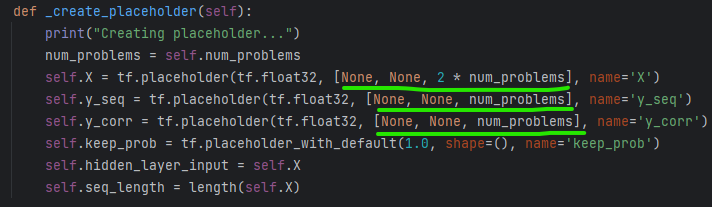

### D. Model 클래스의 preds
- preds는 텐서플로우의 sigmoid
- 
- 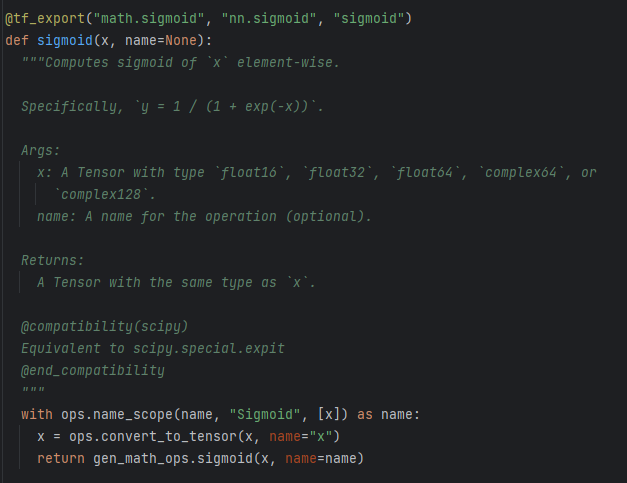